In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [2]:
df = pd.read_csv('GoldPrice.csv')

In [3]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [5]:
df.drop(['Vol.','Change %'], axis = 1, inplace = True)

In [6]:
df

,Date,Price,Open,High,Low
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80"
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20"
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20"
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00"
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55"
...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80"
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30"
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00"
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30"


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by = 'Date', ascending = True, inplace = True)
df.reset_index(drop = True, inplace = True)

In [8]:
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''},regex = True)
df[NumCols] = df[NumCols].astype('float64')

In [9]:
df.head()

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


In [10]:
df.tail()

,Date,Price,Open,High,Low
2578,2022-12-26,1809.7,1805.8,1811.95,1805.55
2579,2022-12-27,1823.1,1808.2,1841.90,1808.00
2580,2022-12-28,1815.8,1822.4,1822.80,1804.20
2581,2022-12-29,1826.0,1812.3,1827.30,1811.20
2582,2022-12-30,1826.2,1821.8,1832.40,1819.80


In [11]:
df.head(10)

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8
5,2013-01-09,1656.5,1660.7,1664.2,1652.3
6,2013-01-10,1679.0,1656.7,1679.2,1656.7
7,2013-01-11,1661.6,1674.8,1675.7,1655.0
8,2013-01-14,1670.4,1662.3,1675.2,1662.3
9,2013-01-15,1684.9,1669.7,1685.3,1669.2


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64

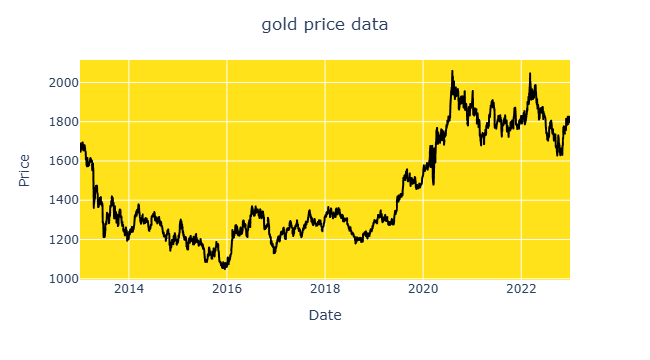

In [14]:
fig = px.line(y = df.Price , x = df.Date)
fig.update_traces(line_color = 'black')
fig.update_layout(xaxis_title = 'Date', yaxis_title = 'Price', title = {'text':'gold price data','y':0.95, 'x':0.5,'xanchor':'center','yanchor':'top'}, plot_bgcolor = 'rgba(255,223,0,0.9)')

In [15]:
test_size = df[df.Date.dt.year == 2022].shape[0]
test_size

260

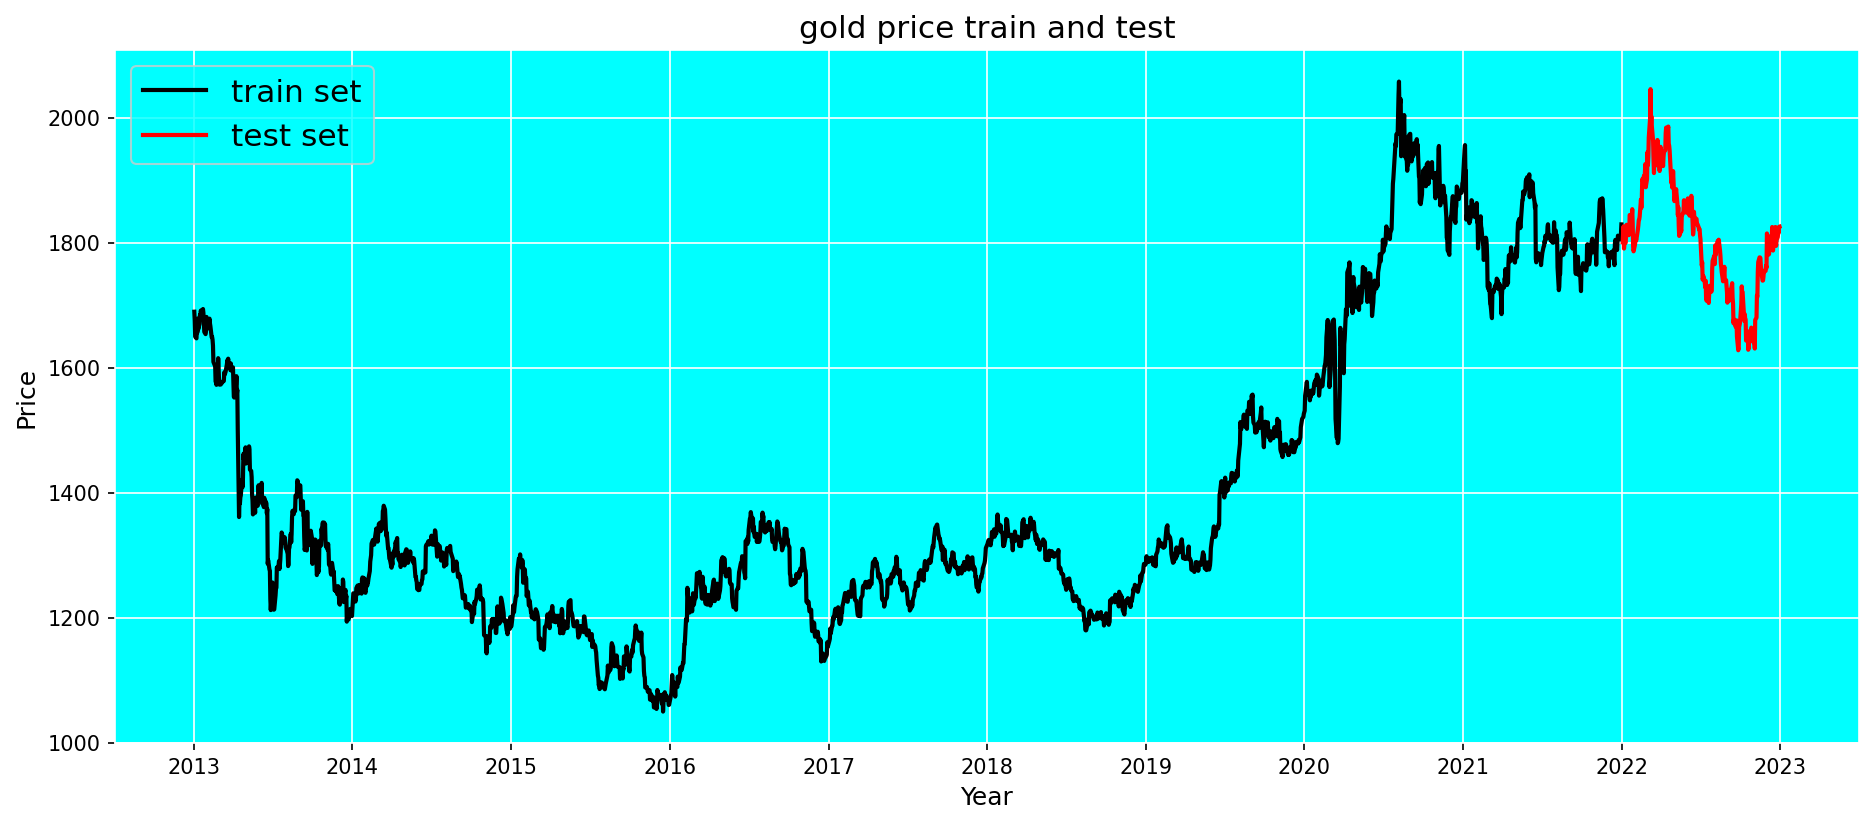

In [16]:
plt.figure(figsize=(15,6), dpi=150)
plt.rcParams['axes.facecolor'] = 'cyan'
plt.rc('axes', edgecolor = 'white')
plt.plot(df.Date[:-test_size], df.Price[:-test_size], color = 'black', lw = 2)
plt.plot(df.Date[-test_size:], df.Price[-test_size:], color = 'red', lw = 2)
plt.title('gold price train and test', fontsize = 15)
plt.xlabel('Year', fontsize = '12')
plt.ylabel('Price', fontsize = '12')
plt.legend(['train set', 'test set'], loc = 'upper left', prop = {'size':15})

plt.grid(color = 'white')
plt.show()

In [17]:
scaler = MinMaxScaler()
scaler.fit(df.Price.values.reshape(-1,1))

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [18]:
window_size = 60

In [19]:
train_data = df.Price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [20]:
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [21]:
test_data = df.Price[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [22]:
x_test = []
y_test = []

for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])

In [23]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [25]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (2263, 60, 1)
y_train shape:  (2263, 60, 1)
x_test shape:  (260, 60, 1)
y_test shape:  (260, 1)


In [42]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences = True)(input1)
    x = Dropout(0.2)(x)
    #x = LSTM(units = 64, return_sequences = True)(x)
    #x = Dropout(0.2)(x)
    #x = LSTM(units = 64, return_sequences = True)(x)
    #x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences = True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation = 'softmax')(x)

    dnn_output = Dense(1)(x)
    model = Model(inputs = input1, outputs = [dnn_output])
    model.compile(loss = 'mean_squared_error', optimizer = 'Nadam')
    model.summary()

    return model

In [43]:
model = define_model()
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1, verbose = 1)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0381 - val_loss: 0.0645
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0100 - val_loss: 0.0283
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0063 - val_loss: 0.0149
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0042 - val_loss: 0.0046
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0013 - val_loss: 0.0066


In [44]:
result = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0046
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


In [45]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 1 - MAPE

In [46]:
print('Test Loss: ', result)
print('Test MAPE: ', MAPE)
print('Test Accuracy: ', accuracy)

Test Loss:  0.004646896850317717
Test MAPE:  0.0771495688448296
Test Accuracy:  0.9228504311551704


In [47]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

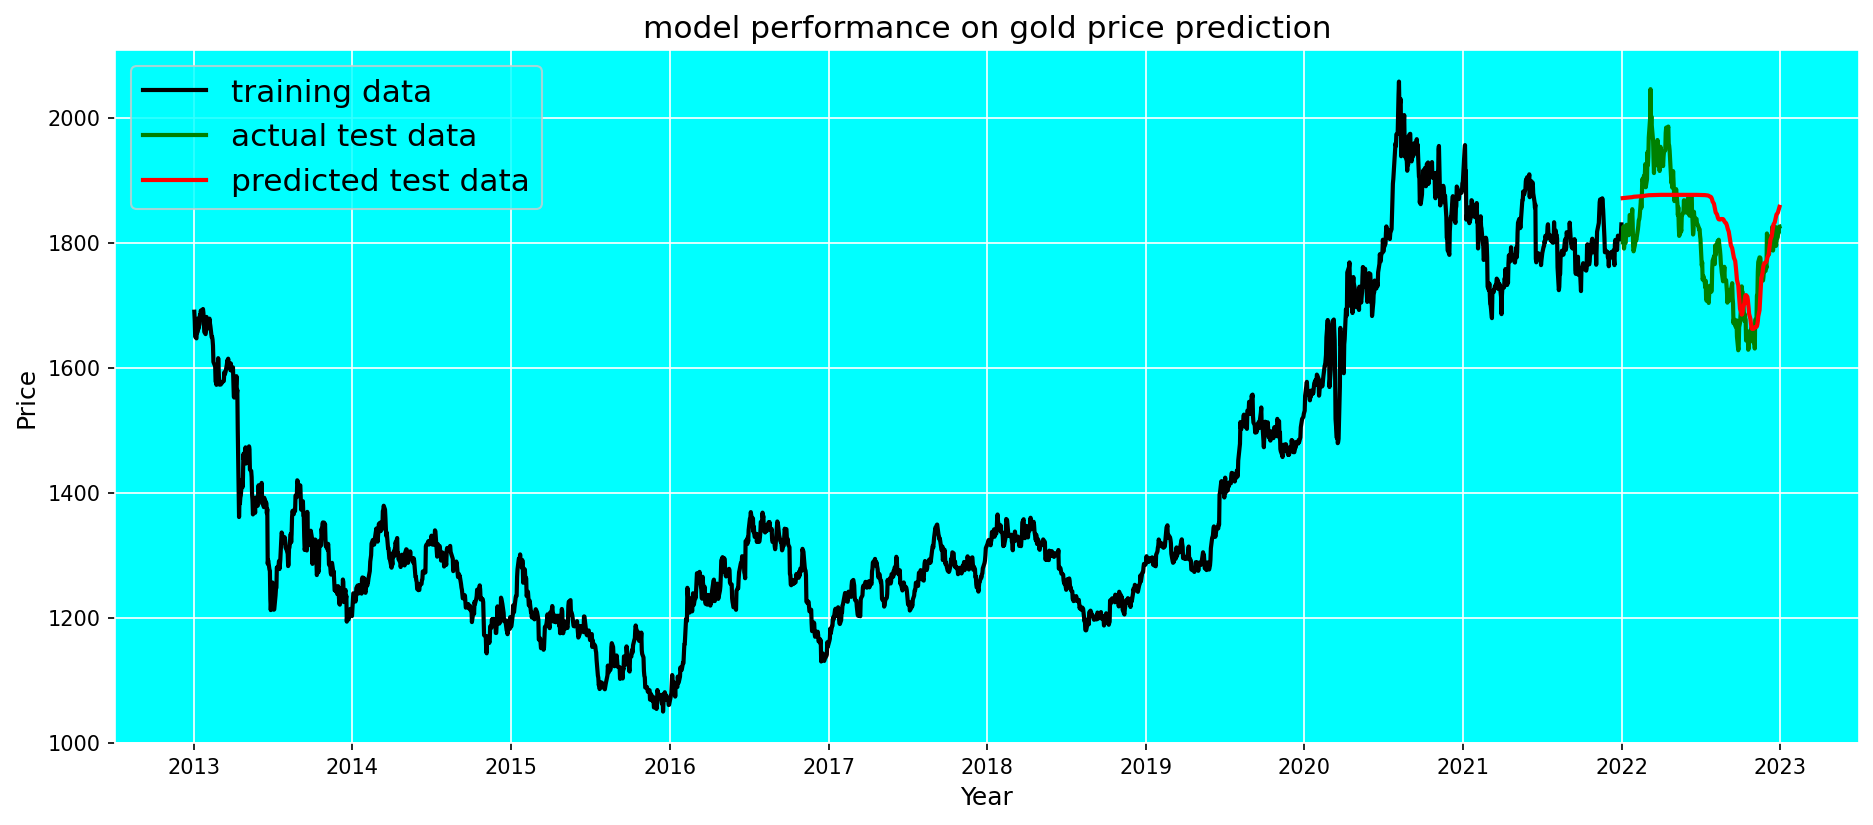

In [48]:
plt.figure(figsize=(15,6), dpi=150)
plt.rcParams['axes.facecolor'] = 'cyan'
plt.rc('axes', edgecolor = 'white')

plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color = 'black', lw = 2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color = 'green', lw = 2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color = 'red', lw = 2)

plt.title('model performance on gold price prediction', fontsize = 15)
plt.xlabel('Year', fontsize = '12')
plt.ylabel('Price', fontsize = '12')
plt.legend(['training data', 'actual test data', 'predicted test data'], loc = 'upper left', prop = {'size':15})

plt.grid(color = 'white')
plt.show()